# Library Imports

In [2]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from utils.Validator import *
pd.set_option('display.max_columns', None)  
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load + Transform

## Users

In [45]:
df_users = pd.read_csv(r"../data/raw/Users.csv",dtype=str)
df_users.head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,kaggleteam,Kaggle Team,03/24/2011,5
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,2
2,381,iguyon,Isabelle,01/29/2010,2
3,383,davidstephan,David Stephan,02/01/2010,0
4,384,gabewarren,Gabe Warren,02/02/2010,0


In [46]:
Validator.validar_categorico(df_users,["Id","UserName","DisplayName"])

,Variable,n,Missing,%Missing,Unico
0,Id,10087437,0,0.0,10087437
0,UserName,10087437,1,0.0,10087436
0,DisplayName,10087437,219,0.0,8517586


In [47]:
df_users[df_users["DisplayName"].isnull()].head()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
11932,13059,null13059,NaN,07/11/2011,0
15535,16853,null116853,NaN,04/04/2011,1
15704,17030,null217030,NaN,04/08/2011,0
36818,41327,yixuanq,NaN,04/28/2012,1
71276,78343,user78343,NaN,12/31/2012,0


In [48]:
df_users["RegisterDate"] = df_users["RegisterDate"].astype("datetime64")

<AxesSubplot:xlabel='RegisterDate'>

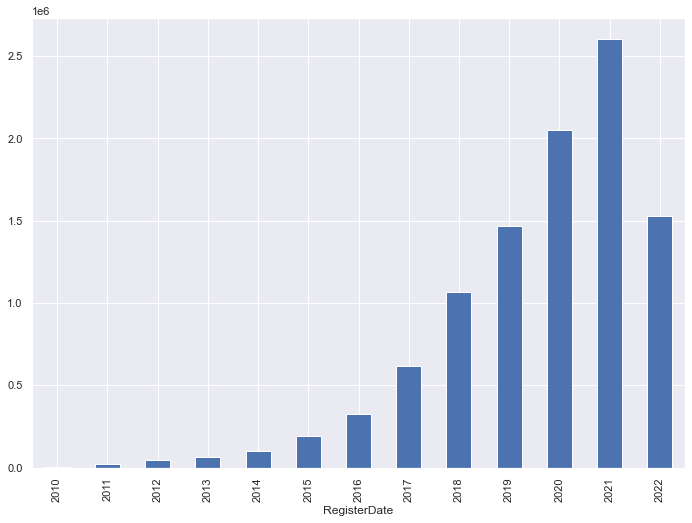

In [49]:
df_users.groupby([df_users["RegisterDate"].dt.year])["RegisterDate"].count().plot(kind="bar")

In [50]:
df_users["PerformanceTier"].value_counts()

0    9893236
1     180535
2      11167
3       2096
4        349
5         54
Name: PerformanceTier, dtype: int64

## User Followers

In [51]:
df_user_followers = pd.read_csv(r"../data/raw/UserFollowers.csv",dtype=str)
df_user_followers.head()

,Id,UserId,FollowingUserId,CreationDate
0,64,368,993,05/23/2017
1,122289,368,67483,08/07/2018
2,323230,368,1663522,09/18/2019
3,412502,368,1302389,03/08/2020
4,447841,368,391404,04/27/2020


<AxesSubplot:xlabel='CreationDate'>

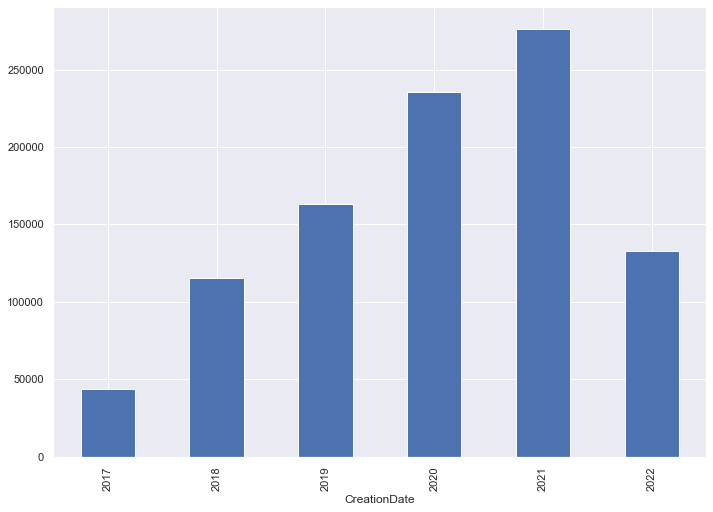

In [52]:
df_user_followers["CreationDate"] = df_user_followers["CreationDate"].astype("datetime64")
df_user_followers.groupby([df_user_followers["CreationDate"].dt.year])["CreationDate"].count().plot(kind="bar")

In [53]:
df_user_followers = df_user_followers[["UserId","FollowingUserId"]]
df_user_followers.head()

,UserId,FollowingUserId
0,368,993
1,368,67483
2,368,1663522
3,368,1302389
4,368,391404


## User Achievements

In [4]:
df_user_achievements = pd.read_csv(r"../data/raw/UserAchievements.csv",dtype=str)
df_user_achievements.head()

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
0,3739822,1,Discussion,1,11/06/2019,0,NaN,3,0,0,14
1,3916402,1,Competitions,1,11/06/2019,0,NaN,NaN,0,0,0
2,3739823,368,Competitions,1,07/15/2016,232,NaN,75,0,0,0
3,3739824,368,Scripts,2,09/21/2016,41,2054,2005,0,3,13
4,3739825,368,Discussion,2,08/30/2016,218,337,337,14,13,139


In [5]:
df_user_achievements = df_user_achievements[["Id","UserId","AchievementType","Tier","Points","CurrentRanking","TotalGold","TotalSilver","TotalBronze"]]
df_user_achievements.head()

,Id,UserId,AchievementType,Tier,Points,CurrentRanking,TotalGold,TotalSilver,TotalBronze
0,3739822,1,Discussion,1,0,NaN,0,0,14
1,3916402,1,Competitions,1,0,NaN,0,0,0
2,3739823,368,Competitions,1,232,NaN,0,0,0
3,3739824,368,Scripts,2,41,2054,0,3,13
4,3739825,368,Discussion,2,218,337,14,13,139


In [6]:
Validator.validar_categorico(df_user_achievements,["Id","UserId","AchievementType"])

,Variable,n,Missing,%Missing,Unico
0,Id,40350448,0,0.0,40350448
0,UserId,40350448,0,0.0,10087612
0,AchievementType,40350448,0,0.0,4


In [7]:
df_user_achievements["AchievementType"].unique()

array(['Discussion', 'Competitions', 'Scripts', 'Datasets'], dtype=object)

In [8]:
df_user_achievements[df_user_achievements["AchievementType"]=="Scripts"].head()

,Id,UserId,AchievementType,Tier,Points,CurrentRanking,TotalGold,TotalSilver,TotalBronze
3,3739824,368,Scripts,2,41,2054,0,3,13
6,3739827,381,Scripts,1,0,NaN,0,0,0
20,3739833,394,Scripts,1,0,NaN,0,0,0
25,3739836,397,Scripts,1,0,NaN,0,0,0
28,3739839,398,Scripts,1,0,NaN,0,0,0


## User Organizations 

In [9]:
df_user_organizations = pd.read_csv(r"../data/raw/UserOrganizations.csv",dtype=str)
df_user_organizations.head()

,Id,UserId,OrganizationId,JoinDate
0,1,13209,2,09/13/2016
1,3,993,4,09/23/2016
2,4,699407,4,09/23/2016
3,5,368,4,09/23/2016
4,6,2505,4,09/23/2016


In [10]:
df_user_organizations = df_user_organizations.iloc[:,:-1]
df_user_organizations.head()

,Id,UserId,OrganizationId
0,1,13209,2
1,3,993,4
2,4,699407,4
3,5,368,4
4,6,2505,4


In [11]:
Validator.validar_categorico(df_user_organizations,["Id","UserId","OrganizationId"])

,Variable,n,Missing,%Missing,Unico
0,Id,1676,0,0.0,1676
0,UserId,1676,0,0.0,1101
0,OrganizationId,1676,0,0.0,600


## Organizations

In [12]:
df_organizations = pd.read_csv(r"../data/raw/Organizations.csv",dtype=str)
df_organizations.head()

,Id,Name,Slug,CreationDate,Description
0,2,Facebook,facebook,07/25/2016,Facebook was built to help people connect and ...
1,3,Figure Eight,crowdflower,08/20/2016,[Figure Eight](https://www.figure-eight.com/) ...
2,4,Kaggle,kaggle,09/23/2016,Kaggle is a community of data scientists and d...
3,5,Last-Place Ltd.,lastplaceltd,09/27/2016,NaN
4,6,CWILOC,cwiloc,09/27/2016,[Climatological Database for the World's Ocean...


In [13]:
df_organizations = df_organizations[["Id","Name"]]
df_organizations.head()

,Id,Name
0,2,Facebook
1,3,Figure Eight
2,4,Kaggle
3,5,Last-Place Ltd.
4,6,CWILOC


In [14]:
Validator.validar_categorico(df_organizations,["Id","Name"])

,Variable,n,Missing,%Missing,Unico
0,Id,654,0,0.0,654
0,Name,654,0,0.0,654


## Competitions

In [15]:
df_competitions = pd.read_csv(r"../data/raw/Competitions.csv",dtype=str)

In [16]:
df_competitions.head(5)

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Eurovision2010,Forecast Eurovision Voting,This competition requires contestants to forec...,Featured,2,NaN,1,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,AE,Absolute Error,Total sum of absolute value of each individual...,False,NaN,NaN,5,5,20,False,False,False,False,USD,1000.0000,1,1,False,22,25,22
1,2435,hivprogression,Predict HIV Progression,This contest requires competitors to predict t...,Featured,1,NaN,1,NaN,04/27/2010 21:29:09,08/02/2010 12:32:00,NaN,NaN,NaN,NaN,True,True,False,True,30,0.00000,MCE,Mean Consequential Error,Averages consequential error (i.e. if predicti...,True,Boolean,"{0, 1}",4,4,20,False,False,False,False,USD,500.0000,1,1,True,107,116,855
2,2438,worldcup2010,World Cup 2010 - Take on the Quants,Quants at Goldman Sachs and JP Morgan have mod...,Featured,NaN,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:29:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0000,1,0.5,False,0,0,0
3,2439,informs2010,INFORMS Data Mining Contest 2010,The goal of this contest is to predict short t...,Featured,4,NaN,1,NaN,06/21/2010 21:53:25,10/10/2010 02:28:00,NaN,NaN,NaN,NaN,True,True,False,True,10,0.00000,AUC,Area Under Receiver Operating Characteristic C...,Measures discrimination. Calculates how well a...,True,A real number,"(-Infinity, Infinity)",5,5,20,False,False,False,False,USD,0.0000,1,1,True,145,153,1483
4,2442,worldcupconf,World Cup 2010 - Confidence Challenge,The Confidence Challenge requires competitors ...,Featured,3,NaN,1,NaN,06/03/2010 08:08:08,06/11/2010 13:28:00,NaN,NaN,NaN,NaN,True,True,False,False,10,0.00000,Custom,Custom Evaluation Metric,A placeholder that indicates a custom algorith...,False,NaN,NaN,5,5,20,False,False,False,False,USD,100.0000,1,0.5,False,63,64,63


In [17]:
df_competitions = df_competitions[["Id","Title","OrganizationId","CompetitionTypeId","EnabledDate","RewardType","TotalTeams","EvaluationAlgorithmAbbreviation","RewardQuantity"]]
df_competitions.head()

,Id,Title,OrganizationId,CompetitionTypeId,EnabledDate,RewardType,TotalTeams,EvaluationAlgorithmAbbreviation,RewardQuantity
0,2408,Forecast Eurovision Voting,NaN,1,04/07/2010 07:57:43,USD,22,AE,1000.0000
1,2435,Predict HIV Progression,NaN,1,04/27/2010 21:29:09,USD,107,MCE,500.0000
2,2438,World Cup 2010 - Take on the Quants,NaN,1,06/03/2010 08:08:08,USD,0,Custom,100.0000
3,2439,INFORMS Data Mining Contest 2010,NaN,1,06/21/2010 21:53:25,USD,145,AUC,0.0000
4,2442,World Cup 2010 - Confidence Challenge,NaN,1,06/03/2010 08:08:08,USD,63,Custom,100.0000


In [18]:
df_competitions["TotalTeams"] = df_competitions["TotalTeams"].astype(int)
df_competitions["RewardQuantity"] = df_competitions["RewardQuantity"].astype(float)
Validator.validar_numerico(df_competitions,["TotalTeams","RewardQuantity"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalTeams,5485,0,0.00,0,0.0,584,110.43,0.0,8751.0,97.00,1391.08,12.0,40.0,150.0,527.8,2120.48,716,13.05,112,2.04,547,9.97,275,5.01,55,1.00
0,RewardQuantity,5485,4191,76.41,0,0.0,63,11926.88,0.0,1500000.0,1093.75,226086.33,0.0,437.5,25000.0,50000.0,150700.00,291,5.31,7,0.13,102,1.86,54,0.98,13,0.24


In [19]:
Validator.validar_categorico(df_competitions,["Id","Title","OrganizationId","CompetitionTypeId","RewardType","EvaluationAlgorithmAbbreviation","RewardQuantity"])

,Variable,n,Missing,%Missing,Unico
0,Id,5485,0,0.00,5485
0,Title,5485,0,0.00,5108
0,OrganizationId,5485,5109,93.14,140
0,CompetitionTypeId,5485,0,0.00,2
0,RewardType,5485,4687,85.45,7
0,EvaluationAlgorithmAbbreviation,5485,1,0.02,138
0,RewardQuantity,5485,4191,76.41,63


In [20]:
df_competitions["EvaluationAlgorithmAbbreviation"].value_counts()

CategorizationAccuracy                                       1943
RMSE                                                          987
AUC                                                           660
MeanFScore                                                    353
MAE                                                           253
                                                             ... 
SmartphoneDecimeter                                             1
SantaJobScheduling                                              1
CSIROObjectDetectionFBeta                                       1
PKUAutoDrivingAP                                                1
IntersectionOverUnionObjectSegmentationWithClassification       1
Name: EvaluationAlgorithmAbbreviation, Length: 138, dtype: int64

In [21]:
df_competitions["CompetitionTypeId"].value_counts()

1    5484
2       1
Name: CompetitionTypeId, dtype: int64

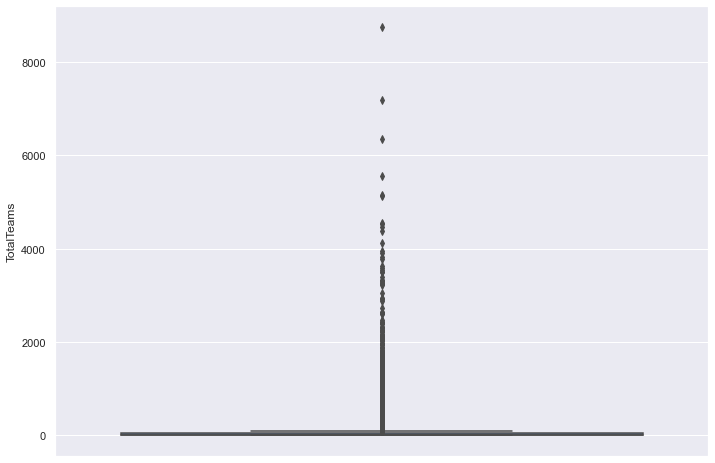

In [22]:
sns.boxplot( y='TotalTeams', data=df_competitions)
plt.show()

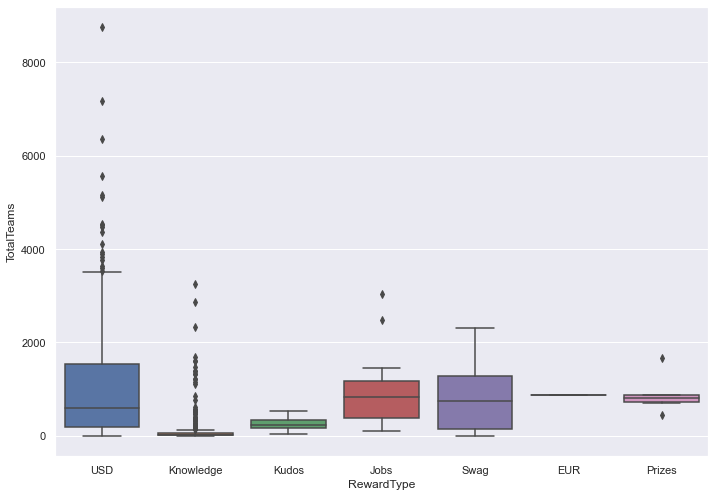

In [23]:
sns.boxplot(x="RewardType", y='TotalTeams', data=df_competitions)
plt.show()

In [24]:
df_competitions = df_competitions[["Id","Title","OrganizationId"]]
df_competitions.head()

,Id,Title,OrganizationId
0,2408,Forecast Eurovision Voting,NaN
1,2435,Predict HIV Progression,NaN
2,2438,World Cup 2010 - Take on the Quants,NaN
3,2439,INFORMS Data Mining Contest 2010,NaN
4,2442,World Cup 2010 - Confidence Challenge,NaN


## Competitions Tags

In [ ]:
df_comp_tags = pd.read_csv(r"../data/raw/CompetitionTags.csv",dtype=str)
df_comp_tags.head()

,Id,CompetitionId,TagId
0,126,3486,14102
1,336,3526,12116
2,335,3526,14101
3,334,3526,14104
4,362,3706,2606


In [ ]:
Validator.validar_categorico(df_comp_tags, ["Id","CompetitionId","TagId"])

,Variable,n,Missing,%Missing,Unico
0,Id,686,0,0.0,686
0,CompetitionId,686,0,0.0,314
0,TagId,686,0,0.0,101


## Teams

In [36]:
df_teams = pd.read_csv(r"../data/raw/Teams.csv",dtype=str)
df_teams.head()

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
0,496,2435,647,team1,NaN,05/04/2010,2192,2192,False,NaN,09/06/2018,59,83
1,497,2435,619,jonp,NaN,04/30/2010,2182,2182,False,3,07/15/2016,41,25
2,499,2435,663,Bwaas,NaN,05/01/2010,2184,2184,False,NaN,09/06/2018,102,100
3,500,2435,673,Thylacoleo,NaN,07/10/2010,2187,2187,False,3,07/15/2016,31,23
4,501,2435,435,pjonesdotcda,NaN,05/05/2010,2194,2191,False,NaN,09/06/2018,67,80


In [37]:
df_teams = df_teams[["Id","CompetitionId","TeamName","Medal","PrivateLeaderboardRank"]]
df_teams.head()

,Id,CompetitionId,TeamName,Medal,PrivateLeaderboardRank
0,496,2435,team1,NaN,83
1,497,2435,jonp,3,25
2,499,2435,Bwaas,NaN,100
3,500,2435,Thylacoleo,3,23
4,501,2435,pjonesdotcda,NaN,80


In [38]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357344 entries, 0 to 5357343
Data columns (total 5 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Id                      object
 1   CompetitionId           object
 2   TeamName                object
 3   Medal                   object
 4   PrivateLeaderboardRank  object
dtypes: object(5)
memory usage: 204.4+ MB


In [39]:
Validator.validar_categorico(df_teams, ["Medal","PrivateLeaderboardRank"])

,Variable,n,Missing,%Missing,Unico
0,Medal,5357344,5309895,99.11,4
0,PrivateLeaderboardRank,5357344,4743246,88.54,8751


In [41]:
df_teams["Medal"] = df_teams["Medal"].astype(float)
df_teams["PrivateLeaderboardRank"] = df_teams["PrivateLeaderboardRank"].astype(float)
Validator.validar_numerico(df_teams, ["Medal","PrivateLeaderboardRank"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,Medal,5357344,5309895,99.11,0,0.0,4,2.42,0.0,3.0,4.5,4.34,3.0,3.0,3.0,3.0,3.0,70,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,PrivateLeaderboardRank,5357344,4743246,88.54,0,0.0,8751,894.14,1.0,8751.0,2922.0,4347.09,472.0,1230.0,2366.0,3229.0,5424.0,40060,0.75,12528,0.23,61389,1.15,30701,0.57,6140,0.11


## Team Memberships

In [42]:
df_team_member = pd.read_csv(r"../data/raw/TeamMemberships.csv",dtype=str)
df_team_member.head()

,Id,TeamId,UserId,RequestDate
0,16458,518,635,NaN
1,16464,526,839,NaN
2,16465,527,816,NaN
3,16466,528,778,NaN
4,16467,529,747,NaN


In [43]:
df_team_member = df_team_member.iloc[:,:-1]
df_team_member.head()

,Id,TeamId,UserId
0,16458,518,635
1,16464,526,839
2,16465,527,816
3,16466,528,778
4,16467,529,747


In [44]:
Validator.validar_categorico(df_team_member, ['TeamId', 'UserId'])

,Variable,n,Missing,%Missing,Unico
0,TeamId,5478304,0,0.0,5327693
0,UserId,5478304,0,0.0,1971901


## Tags

In [45]:
df_tags = pd.read_csv(r"../data/raw/Tags.csv",dtype=str)
df_tags.head()

,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,1115,12116,websites,web-sites,subject > science and technology > internet > ...,"Websites, like this one, are collections of co...",215,0,186
1,1219,12000,research,research,subject > science and technology > research,Research is our endeavor to systematically inc...,342,6,249
2,1220,12116,search engines,search-engines,subject > science and technology > internet > ...,NaN,56,0,69
3,1222,11105,universities and colleges,universities-and-colleges,subject > people and society > education > uni...,This tag contains all kinds of information abo...,3469,0,383
4,2100,16637,culture and humanities,culture-and-humanities,subject > culture and humanities,What is it to be human? What activities and pa...,174,0,62


In [46]:
df_tags = df_tags[["Id","ParentTagId","Name"]]
df_tags.head()

,Id,ParentTagId,Name
0,1115,12116,websites
1,1219,12000,research
2,1220,12116,search engines
3,1222,11105,universities and colleges
4,2100,16637,culture and humanities


In [47]:
Validator.validar_categorico(df_tags, ["Id","ParentTagId","Name"])

,Variable,n,Missing,%Missing,Unico
0,Id,320,0,0.00,320
0,ParentTagId,320,7,2.19,60
0,Name,320,0,0.00,320


## Datasets

In [50]:
df_datasets = pd.read_csv(r"../data/raw/Datasets.csv",dtype=str)
df_datasets.head()

,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels
0,17,993,NaN,3,742210,762847,989,2,01/07/2016 00:38:08,02/06/2018,506268,70079,911,422
1,19,1,NaN,7,420,420,997,2,01/12/2016 00:33:31,02/06/2018,1163503,292786,2997,5731
2,26,553913,553913,NaN,793501,815299,1110,2,03/08/2016 22:41:02,02/05/2018,67812,9658,266,143
3,28,1132983,NaN,223,3144,3144,1116,2,03/10/2016 04:37:43,02/06/2018,159067,18246,320,194
4,53,627861,NaN,621,102,102,1318,2,06/03/2016 00:27:28,02/04/2018,49998,4887,89,156


In [51]:
df_datasets = df_datasets[["Id","CreatorUserId","ForumId","Type","TotalViews","TotalDownloads"]]
df_datasets.head()

,Id,CreatorUserId,ForumId,Type,TotalViews,TotalDownloads
0,17,993,989,2,506268,70079
1,19,1,997,2,1163503,292786
2,26,553913,1110,2,67812,9658
3,28,1132983,1116,2,159067,18246
4,53,627861,1318,2,49998,4887


In [52]:
Validator.validar_categorico(df_datasets, ["Id","CreatorUserId","ForumId","Type"])

,Variable,n,Missing,%Missing,Unico
0,Id,160934,0,0.0,160934
0,CreatorUserId,160934,0,0.0,66438
0,ForumId,160934,0,0.0,160934
0,Type,160934,0,0.0,1


In [53]:
df_datasets["TotalViews"] = df_datasets["TotalViews"].astype(int)
df_datasets["TotalDownloads"] = df_datasets["TotalDownloads"].astype(int)
Validator.validar_numerico(df_datasets, ["TotalViews","TotalDownloads"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalViews,160934,0,0.0,0,0.0,11378,2287.70,0,9282156,1592.5,103477.27,319.0,721.0,2196.0,5004.0,30588.85,20615,12.81,461,0.29,16091,10.00,8046,5.0,1610,1.0
0,TotalDownloads,160934,0,0.0,0,0.0,4140,253.17,0,422666,75.0,11219.89,4.0,30.0,173.0,488.0,3679.67,25664,15.95,562,0.35,16035,9.96,8046,5.0,1610,1.0


## Dataset Tags

In [54]:
df_dataset_tags = pd.read_csv(r"../data/raw/DatasetTags.csv",dtype=str)
df_dataset_tags.head()

,Id,DatasetId,TagId
0,1879,2234,1115
1,2182,2482,1115
2,2408,2700,1115
3,3756,8095,1115
4,5942,22268,1115


In [55]:
Validator.validar_categorico(df_dataset_tags, df_dataset_tags.columns)

,Variable,n,Missing,%Missing,Unico
0,Id,159431,0,0.0,159431
0,DatasetId,159431,0,0.0,72030
0,TagId,159431,0,0.0,297


## Forums

In [56]:
df_forums = pd.read_csv(r"../data/raw/Forums.csv",dtype=str)
df_forums.head()

,Id,ParentForumId,Title
0,1,8,Predict HIV Progression
1,2,8,Forecast Eurovision Voting
2,3,8,World Cup 2010 - Take on the Quants
3,4,8,INFORMS Data Mining Contest 2010
4,5,NaN,Active Competitions


In [57]:
Validator.validar_categorico(df_forums, df_forums.columns)

,Variable,n,Missing,%Missing,Unico
0,Id,165177,0,0.00,165177
0,ParentForumId,165177,25,0.02,8
0,Title,165177,188,0.11,150756


In [58]:
df_forums[df_forums["ParentForumId"].isna()]

,Id,ParentForumId,Title
4,5,NaN,Active Competitions
5,8,NaN,Past Competitions
6,9,NaN,General
319,1023,NaN,Public Datasets
4711,16860,NaN,Notebooks
33036,573890,NaN,Dataset Tasks
99040,1462505,NaN,Intro to Machine Learning
99041,1462506,NaN,Pandas
99042,1462507,NaN,Intro to SQL
99043,1462508,NaN,Python


## ForumsTopics

In [59]:
df_forum_topics = pd.read_csv(r"../data/raw/ForumTopics.csv",dtype=str)
df_forum_topics.head()

,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
0,1,1,NaN,212,1,04/28/2010 23:13:08,04/28/2010 23:13:08,A few techniques you might try:,False,9405,0,19,18
1,2,1,NaN,4,2,04/29/2010 15:48:46,04/29/2010 15:48:46,Question regarding algorithms used,False,2185,0,3,2
2,3,1,NaN,41,5,04/30/2010 14:32:29,04/30/2010 14:32:29,Question about data,False,2121,0,3,2
3,4,1,NaN,13,6,04/30/2010 15:40:57,04/30/2010 15:40:57,Biased sets,False,2780,1,4,3
4,5,1,NaN,12,10,05/01/2010 11:00:57,05/01/2010 11:00:57,Non-standard nucleotide codings,False,2045,0,2,1


In [60]:
df_forum_topics = df_forum_topics[["Id","ForumId","Title","TotalViews","TotalMessages","Score"]]
df_forum_topics.head()

,Id,ForumId,Title,TotalViews,TotalMessages,Score
0,1,1,A few techniques you might try:,9405,19,0
1,2,1,Question regarding algorithms used,2185,3,0
2,3,1,Question about data,2121,3,0
3,4,1,Biased sets,2780,4,1
4,5,1,Non-standard nucleotide codings,2045,2,0


In [61]:
df_forum_topics["TotalViews"] = df_forum_topics["TotalViews"].astype(float)
df_forum_topics["TotalMessages"] = df_forum_topics["TotalMessages"].astype(float)
df_forum_topics["Score"] = df_forum_topics["Score"].astype(float)
Validator.validar_numerico(df_forum_topics, ["TotalViews","TotalMessages","Score"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,TotalViews,265031,0,0.0,0,0.00,5618,161.80,0.0,301527.0,0.0,4487.30,0.0,0.0,0.0,552.0,3759.0,18453,6.96,2094,0.79,18453,6.96,13249,5.00,2650,1.00
0,TotalMessages,265031,0,0.0,0,0.00,334,6.08,0.0,26084.0,13.5,170.98,3.0,6.0,12.0,20.0,53.0,23134,8.73,286,0.11,25534,9.63,12807,4.83,2571,0.97
0,Score,265031,0,0.0,2516,0.95,757,10.97,-255.0,12077.0,22.5,193.85,2.0,9.0,24.0,42.0,128.0,27929,10.54,1374,0.52,25372,9.57,12939,4.88,2646,1.00


In [64]:
df_forum_topics[df_forum_topics["Score"]<0].head()

,Id,ForumId,Title,TotalViews,TotalMessages,Score
384,12892,15,March machine learning mania competition,325.0,3.0,-1.0
400,11380,15,Email Analytics,554.0,1.0,-3.0
484,10389,15,My account is blocked because I mistakenly tri...,1125.0,2.0,-6.0
491,10440,15,"Sat, Sept 27: Data Mining Quickstart and Hands...",630.0,1.0,-4.0
492,10442,15,Webinar: Evolution of Classification- Logistic...,1435.0,1.0,-5.0


In [63]:
Validator.validar_categorico(df_forum_topics, ["Id","ForumId","Title"])

,Variable,n,Missing,%Missing,Unico
0,Id,265031,0,0.00,265031
0,ForumId,265031,0,0.00,8201
0,Title,265031,64896,24.49,181889


## Forum Messages

In [65]:
df_forum_messages = pd.read_csv(r"../data/raw/ForumMessages.csv",dtype=str)
df_forum_messages.head()

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,1,1,478,04/28/2010 23:13:08,NaN,<div>In response to a comment on the No Free H...,NaN,NaN
1,2,2,606,04/29/2010 15:48:46,NaN,"Hi, I'm interested in participating in the con...",NaN,NaN
2,3,2,478,04/29/2010 15:48:46,NaN,"Tanya,<div><br></div><div>Good to hear from yo...",NaN,NaN
3,4,2,368,04/29/2010 15:48:46,NaN,"Hi Tanya, <br><br>Kaggle will maintain a ratin...",NaN,NaN
4,5,3,634,04/30/2010 14:32:29,NaN,"Hi,<br><br>I just read in csv files and I've g...",NaN,NaN


In [73]:
df_forum_messages = df_forum_messages[["Id","ForumTopicId","PostUserId","Medal"]]
df_forum_messages.head()

,Id,ForumTopicId,PostUserId,Medal
0,1,1,478,NaN
1,2,2,606,NaN
2,3,2,478,NaN
3,4,2,368,NaN
4,5,3,634,NaN


In [74]:
df_forum_messages[df_forum_messages["Medal"]=="1"].head()

,Id,ForumTopicId,PostUserId,Medal
6903,7160,1153,1335,1
7006,7269,1166,2687,1
9555,10530,1802,19054,1
9936,10949,1889,10748,1
10010,11035,1908,808,1


In [76]:
df_forum_messages["Medal"] = df_forum_messages["Medal"].astype(float)
Validator.validar_numerico(df_forum_messages, ["Medal"])

c:\Users\t21338\Github JSH\kaggle-network-analysis\.venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,Medal,1572363,917193,58.33,0,0.0,3,2.89,1.0,3.0,3.0,4.1,3.0,3.0,3.0,3.0,3.0,51644,3.28,0,0.0,0,0.0,0,0.0,0,0.0
